In [2]:
%pip install openpyxl --break-system-packages

from pandas import read_excel
d=read_excel("Gasket.xlsx")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
d[d["Y"]>160]

,Operator,Part,Y
0,A,1,167
1,A,1,162
2,A,2,210
3,A,2,213
4,A,3,187
5,A,3,183
6,A,4,189
7,A,4,196
12,B,2,206
13,B,2,199


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

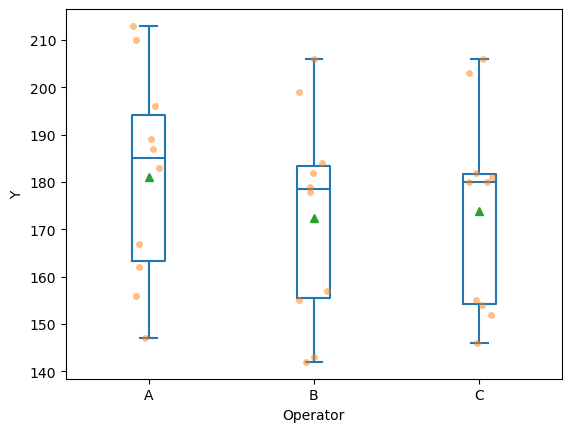

In [15]:
sns.boxplot(data=d, x="Operator",y="Y",width=0.2,fill=False,showmeans=True)
sns.stripplot(data=d,x="Operator",y="Y",alpha=0.5)
plt.show()

In [3]:
d

,Operator,Part,Y
0,A,1,167
1,A,1,162
2,A,2,210
3,A,2,213
4,A,3,187
5,A,3,183
6,A,4,189
7,A,4,196
8,A,5,156
9,A,5,147


In [18]:
d["Operator"].unique()

array(['A', 'B', 'C'], dtype=object)

In [34]:
dd=d[(d["Operator"]=='A') & (d["Part"]==1)]

In [35]:
min(dd["Y"])

162

In [39]:
ranges=[]
for op in d["Operator"].unique():
    for part in d["Part"].unique():
        tmp=d[(d["Operator"]==op)&(d["Part"]==part)]
        if len(tmp)>0:
            ranges.append(max(tmp["Y"]-min(tmp["Y"])))
print(ranges)
print(sum(ranges)/len(ranges))

[5, 3, 4, 7, 9, 2, 7, 3, 6, 1, 3, 3, 1, 2, 8]
4.266666666666667


In [52]:
def d2(n,k):
    # https://andrewmilivojevich.com/d2-values-for-the-distribution-of-the-average-range/
    data = [
    [1.414, 1.912, 2.239, 2.481, 2.673, 2.830, 2.963, 3.078, 3.179, 3.263, 3.330, 3.424, 3.491, 3.533],
    [1.279, 1.809, 2.151, 2.405, 2.604, 2.768, 2.906, 3.025, 3.129, 3.221, 3.308, 3.380, 3.449, 3.513],
    [1.197, 1.729, 2.079, 2.379, 2.631, 2.847, 3.036, 3.196, 3.332, 3.449, 3.589, 3.689, 3.825, 3.930],
    [1.206, 1.750, 2.105, 2.366, 2.570, 2.736, 2.877, 2.997, 3.103, 3.197, 3.282, 3.358, 3.428, 3.492],
    [1.171, 1.733, 2.096, 2.398, 2.628, 2.830, 3.021, 2.987, 3.098, 3.173, 3.272, 3.347, 3.424, 3.489],
    [1.181, 1.721, 2.090, 2.333, 2.558, 2.726, 2.867, 2.988, 3.095, 3.189, 3.274, 3.351, 3.421, 3.486],
    [1.173, 1.726, 2.085, 2.349, 2.555, 2.723, 2.864, 2.986, 3.095, 3.187, 3.272, 3.345, 3.419, 3.481],
    [1.166, 1.721, 2.082, 2.346, 2.559, 2.720, 2.862, 2.984, 3.090, 3.187, 3.274, 3.354, 3.417, 3.482],
    [1.164, 1.718, 2.080, 2.344, 2.550, 2.719, 2.860, 2.982, 3.089, 3.184, 3.269, 3.346, 3.416, 3.481],
    [1.160, 1.716, 2.072, 2.343, 2.548, 2.712, 2.858, 2.981, 3.088, 3.183, 3.269, 3.342, 3.414, 3.480],
    [1.157, 1.714, 2.076, 2.340, 2.547, 2.716, 2.858, 2.980, 3.087, 3.182, 3.267, 3.344, 3.415, 3.473],
    [1.155, 1.712, 2.074, 2.3491, 2.546, 2.715, 2.857, 2.979, 3.086, 3.181, 3.266, 3.343, 3.414, 3.479],
    [1.154, 1.710, 2.072, 2.338, 2.545, 2.714, 2.856, 2.978, 3.085, 3.180, 3.266, 3.343, 3.413, 3.478],
    [1.151, 1.709, 2.072, 2.337, 2.545, 2.714, 2.856, 2.978, 3.085, 3.180, 3.265, 3.342, 3.413, 3.478],
    [1.150, 1.708, 2.071, 2.337, 2.544, 2.713, 2.855, 2.977, 3.084, 3.179, 3.265, 3.342, 3.412, 3.477],
    [1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078, 3.173, 3.259, 3.336, 3.407, 3.472]]
    if n>15:
        n=15
    if k>16:
        k=16
    return data[k-1][n-2]

In [72]:
def EV_stdev(d,op_key="Operator",pt_key="Part",y_key="Y"):
    ranges=[]
    n=0
    for op in d[op_key].unique():
        for part in d[pt_key].unique():
            tmp=d[(d[op_key]==op)&(d[pt_key]==part)]
            n=len(tmp)
            if len(tmp)>0:
                ranges.append(max(tmp[y_key]-min(tmp[y_key])))
    
    rBar= sum(ranges)/len(ranges)
    k=len(ranges)
#     print(n,k)
#     print(d2(n,k))
    return rBar/d2(n,k)

In [76]:
def AV_stdev(d,op_key="Operator",pt_key="Part",y_key="Y"):
    num_of_parts=len(d[pt_key].unique())
    num_of_op=len(d[op_key].unique())
    num_of_tests=len(d)/num_of_parts/num_of_op
    
    op_avgs=[]
    for op in d[op_key].unique():
        tmp=d[d[op_key]==op]
        op_avgs.append(sum(tmp[y_key])/len(tmp))
    R0=max(op_avgs)-min(op_avgs)
    return ((R0/d2(num_of_op,1))**2-EV_stdev(d,op_key=op_key,
            pt_key=pt_key,y_key=y_key)**2/num_of_parts/num_of_tests)**.5
        

In [77]:
print(AV_stdev(d))
print(EV_stdev(d))

4.2879950261620365
3.710144927536232


In [81]:
def Part2Part(d,op_key="Operator",pt_key="Part",y_key="Y"):
    part_avgs=[]
    for pt in d[pt_key].unique():
        tmp=d[d[pt_key]==pt]
        part_avgs.append(sum(tmp[y_key])/len(tmp))
    R_part=max(part_avgs)-min(part_avgs)
    return R_part/d2(len(part_avgs),1)

In [82]:
print(Part2Part(d))

23.444847507725378


In [112]:
def GRR(data,op_key="Operator",pt_key="Part",y_key="Y",
		print_out=True, has_op_col=True):

	def d2(n,k):
		# https://andrewmilivojevich.com/d2-values-for-the-distribution-of-the-average-range/
		data = [
		[1.414, 1.912, 2.239, 2.481, 2.673, 2.830, 2.963, 3.078, 3.179, 3.263, 3.330, 3.424, 3.491, 3.533],
		[1.279, 1.809, 2.151, 2.405, 2.604, 2.768, 2.906, 3.025, 3.129, 3.221, 3.308, 3.380, 3.449, 3.513],
		[1.197, 1.729, 2.079, 2.379, 2.631, 2.847, 3.036, 3.196, 3.332, 3.449, 3.589, 3.689, 3.825, 3.930],
		[1.206, 1.750, 2.105, 2.366, 2.570, 2.736, 2.877, 2.997, 3.103, 3.197, 3.282, 3.358, 3.428, 3.492],
		[1.171, 1.733, 2.096, 2.398, 2.628, 2.830, 3.021, 2.987, 3.098, 3.173, 3.272, 3.347, 3.424, 3.489],
		[1.181, 1.721, 2.090, 2.333, 2.558, 2.726, 2.867, 2.988, 3.095, 3.189, 3.274, 3.351, 3.421, 3.486],
		[1.173, 1.726, 2.085, 2.349, 2.555, 2.723, 2.864, 2.986, 3.095, 3.187, 3.272, 3.345, 3.419, 3.481],
		[1.166, 1.721, 2.082, 2.346, 2.559, 2.720, 2.862, 2.984, 3.090, 3.187, 3.274, 3.354, 3.417, 3.482],
		[1.164, 1.718, 2.080, 2.344, 2.550, 2.719, 2.860, 2.982, 3.089, 3.184, 3.269, 3.346, 3.416, 3.481],
		[1.160, 1.716, 2.072, 2.343, 2.548, 2.712, 2.858, 2.981, 3.088, 3.183, 3.269, 3.342, 3.414, 3.480],
		[1.157, 1.714, 2.076, 2.340, 2.547, 2.716, 2.858, 2.980, 3.087, 3.182, 3.267, 3.344, 3.415, 3.473],
		[1.155, 1.712, 2.074, 2.3491, 2.546, 2.715, 2.857, 2.979, 3.086, 3.181, 3.266, 3.343, 3.414, 3.479],
		[1.154, 1.710, 2.072, 2.338, 2.545, 2.714, 2.856, 2.978, 3.085, 3.180, 3.266, 3.343, 3.413, 3.478],
		[1.151, 1.709, 2.072, 2.337, 2.545, 2.714, 2.856, 2.978, 3.085, 3.180, 3.265, 3.342, 3.413, 3.478],
		[1.150, 1.708, 2.071, 2.337, 2.544, 2.713, 2.855, 2.977, 3.084, 3.179, 3.265, 3.342, 3.412, 3.477],
		[1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.970, 3.078, 3.173, 3.259, 3.336, 3.407, 3.472]]
		if n>15:
			n=15
		if k>16:
			k=16
		return data[k-1][n-2]

	def EV_stdev(d,op_key="Operator",pt_key="Part",y_key="Y"):
		ranges=[]
		n=0
		for op in d[op_key].unique():
			for part in d[pt_key].unique():
				tmp=d[(d[op_key]==op)&(d[pt_key]==part)]
				n=len(tmp)
				if len(tmp)>0:
					ranges.append(max(tmp[y_key]-min(tmp[y_key])))
		
		rBar= sum(ranges)/len(ranges)
		k=len(ranges)
	#     print(n,k)
	#     print(d2(n,k))
		return rBar/d2(n,k)
		
	def AV_stdev(d,op_key="Operator",pt_key="Part",y_key="Y"):
		num_of_parts=len(d[pt_key].unique())
		num_of_op=len(d[op_key].unique())
		num_of_tests=len(d)/num_of_parts/num_of_op
		
		op_avgs=[]
		for op in d[op_key].unique():
			tmp=d[d[op_key]==op]
			op_avgs.append(sum(tmp[y_key])/len(tmp))
		R0=max(op_avgs)-min(op_avgs)
		return ((R0/d2(num_of_op,1))**2-EV_stdev(d,op_key=op_key,
				pt_key=pt_key,y_key=y_key)**2/num_of_parts/num_of_tests)**.5
			
	def Part2Part(d,op_key="Operator",pt_key="Part",y_key="Y"):
		part_avgs=[]
		for pt in d[pt_key].unique():
			tmp=d[d[pt_key]==pt]
			part_avgs.append(sum(tmp[y_key])/len(tmp))
		R_part=max(part_avgs)-min(part_avgs)
		return R_part/d2(len(part_avgs),1)
	
	if not has_op_col:
		data.insert(1,"Operator",[0]*len(data),True)
		op_key="Operator"
	
	EV=EV_stdev(data,op_key=op_key, pt_key=pt_key, y_key=y_key)
	if has_op_col:
		AV=AV_stdev(data,op_key=op_key, pt_key=pt_key, y_key=y_key)
	else:
		AV=0
	PV=Part2Part(data,op_key=op_key, pt_key=pt_key, y_key=y_key)
	GRR=(EV**2+AV**2)**.5
	TTL=(GRR**2+PV**2)**.5
	
	if print_out:
		print("Source\t\t\tStdDev(SD)\t6xSD\t\t(%SV)")
		print("Total GRR\t\t%0.2f\t\t%0.2f\t\t%0.2f"%(GRR,GRR*6,GRR/TTL*100))
		print(" EV(repeatability)\t%0.2f\t\t%0.2f\t\t%0.2f"%(EV,EV*6,EV/TTL*100))
		print(" AV(reproducibility)\t%0.2f\t\t%0.2f\t\t%0.2f"%(AV,AV*6,AV/TTL*100))
		print("PV(Part to Part)\t%0.2f\t\t%0.2f\t\t%0.2f"%(PV,PV*6,PV/TTL*100))
		print("Total Variation\t\t%0.2f\t\t%0.2f\t\t100.00"%(TTL,TTL*6))
		
	res={"EV":EV,"AV":AV,"PV":PV,"RR":GRR,"TV":TTL}
	return res


In [113]:
GRR(d)

Source			StdDev(SD)	6xSD		(%SV)
Total GRR		5.67		34.02		23.51
 EV(repeatability)	3.71		22.26		15.38
 AV(reproducibility)	4.29		25.73		17.78
PV(Part to Part)	23.44		140.67		97.20
Total Variation		24.12		144.72		100.00


{'EV': 3.710144927536232,
 'AV': 4.2879950261620365,
 'PV': 23.444847507725378,
 'RR': 5.670280127799084,
 'TV': 24.120799144891738}

In [114]:
GRR(d[d["Operator"]=="A"].drop("Operator",axis=1),has_op_col=False)

Source			StdDev(SD)	6xSD		(%SV)
Total GRR		4.78		28.69		19.40
 EV(repeatability)	4.78		28.69		19.40
 AV(reproducibility)	0.00		0.00		0.00
PV(Part to Part)	24.18		145.10		98.10
Total Variation		24.65		147.91		100.00


{'EV': 4.782237403928266,
 'AV': 0,
 'PV': 24.18379685610641,
 'RR': 4.782237403928266,
 'TV': 24.652095751983296}

,Part,Y
0,1,167
1,1,162
2,2,210
3,2,213
4,3,187
5,3,183
6,4,189
7,4,196
8,5,156
9,5,147
